# Environment

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import os
from pathlib import Path
from matplotlib_venn import venn2 
from upsetplot import from_contents, UpSet
import numpy as np
wd_dir = '/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/custom_pipeline/notebooks'
os.chdir(wd_dir)

root_dir = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/custom_pipeline"

current_dir = os.getcwd()

# Always reload functions
import importlib
import sys
sys.path.append(f'{root_dir}/scripts')
import functions_CpG_targeting_overlap
importlib.reload(functions_CpG_targeting_overlap)
from functions_CpG_targeting_overlap import *


# CpG Island Analysis


CpG Island Length Statistics:
count    17017.000000
mean       655.518305
std        456.286796
min        201.000000
25%        336.000000
50%        534.000000
75%        828.000000
max       5129.000000
Name: length, dtype: float64


,chrom,start,end,name,score,strand,length
0,chr1,3531624,3531843,611,CpG:,27,219
1,chr1,3670619,3671074,613,CpG:,34,455
2,chr1,3671654,3672156,613,CpG:,45,502
3,chr1,4491701,4493673,619,CpG:,165,1972
4,chr1,4496947,4497608,619,CpG:,47,661


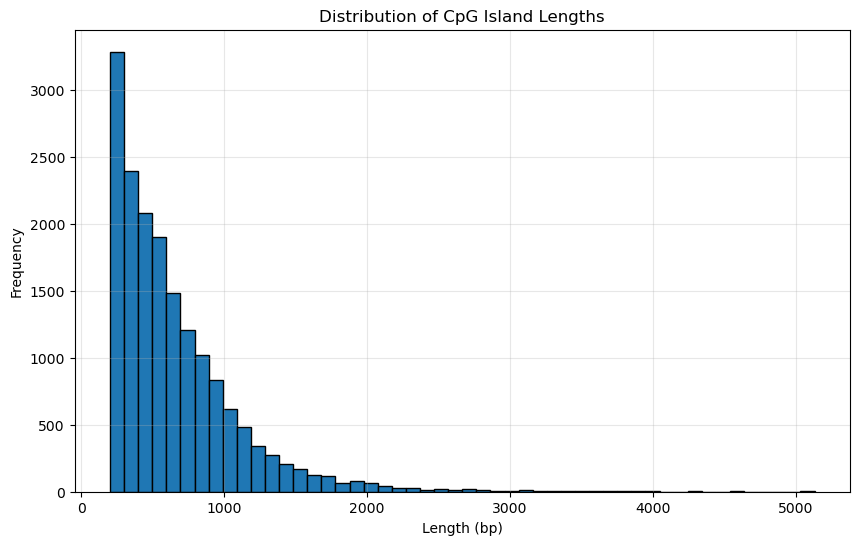

In [15]:
cpg_df = pd.read_csv(f"{root_dir}/DATA/cpg_islands.bed", sep='\t', header=None, 
                     names=['chrom', 'start', 'end', 'name', 'score', 'strand'])

# Calculate lengths
cpg_df['length'] = cpg_df['end'] - cpg_df['start']

# Create histogram of CpG island lengths
plt.figure(figsize=(10,6))
plt.hist(cpg_df['length'], bins=50, edgecolor='black')
plt.title('Distribution of CpG Island Lengths')
plt.xlabel('Length (bp)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Show summary statistics
print("\nCpG Island Length Statistics:")
print(cpg_df['length'].describe())

cpg_df.head()

# CpG Targeting Analysis

In [16]:
cpg_file = f"{root_dir}/DATA/cpg_islands.bed"
output_dir = f"{root_dir}/results/cpg_analysis"
os.makedirs(output_dir, exist_ok=True)

In [25]:
# Threshold = 20%
for cell_type in ['NSC', 'Neuron']:
    # Create output directory for each cell type
    cell_type_dir = f"{output_dir}/{cell_type}"
    os.makedirs(cell_type_dir, exist_ok=True)
    
    results = analyze_cpg_overlap(
        f"{root_dir}/results/consensus_peaks/{cell_type}_Exo_consensus.bed",
        f"{root_dir}/results/consensus_peaks/{cell_type}_Endo_consensus.bed",
        cpg_file,
        cell_type_dir,
        extend=300,
        coverage_threshold=20,
        genome_size_file=f"{root_dir}/DATA/genome.size"
    )



Processing /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/custom_pipeline/results/consensus_peaks/NSC_Exo_consensus.bed
Peaks after chromosome filtering: 63390

Peaks with any CpG overlap: 10463
Peaks meeting 20% coverage threshold: 9804
Coverage range: 20.00% - 100.00%
Mean coverage of qualified peaks: 68.25%

Processing /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/custom_pipeline/results/consensus_peaks/NSC_Endo_consensus.bed
Peaks after chromosome filtering: 47675

Peaks with any CpG overlap: 9167
Peaks meeting 20% coverage threshold: 8604
Coverage range: 20.00% - 100.00%
Mean coverage of qualified peaks: 64.27%

Processing /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/custom_pipeline/results/consensus_peaks/Neuron_Exo_consensus.bed
Peaks after chromosome filtering: 159868

Peaks with any CpG overlap: 15383
Peaks meeting 20% coverage threshold: 14285
Coverage range: 20.00% - 100.00%
Mean coverage of qualified peaks: 68.12%

Processing /beegfs/scr

# MeCP2 CpG Targeting Analysis

## Neural Progenitor Cells (NPCs/NSCs)
- Exogenous MeCP2 targets 2,150 CpG regions (20% coverage threshold)
- Endogenous MeCP2 targets 4,617 CpG regions (20% coverage threshold)
- Exogenous peaks show mean coverage of 46.73%
- Endogenous peaks show mean coverage of 45.69%
- Raw peaks before filtering: 6,993 (Exo) and 12,844 (Endo)

## Neurons
- Exogenous MeCP2 targets 7,452 CpG regions (20% coverage threshold)
- Endogenous MeCP2 targets 7,861 CpG regions (20% coverage threshold)
- Exogenous peaks show mean coverage of 36.41%
- Endogenous peaks show mean coverage of 44.99%
- Raw peaks before filtering: 43,740 (Exo) and 26,958 (Endo)

## Key Observations
- Both cell types show substantial CpG targeting, with thousands of regions meeting the 20% coverage threshold
- Coverage quality is consistent between endogenous and exogenous MeCP2 in NSCs (~46%)
- In neurons, endogenous MeCP2 shows higher mean coverage (44.99%) compared to exogenous (36.41%)
- Neuronal cells show notably higher numbers of binding regions compared to NSCs
- The total number of raw peaks is significantly higher than CpG-overlapping peaks, suggesting selective CpG targeting

In [26]:
# Threshold = 0%
for cell_type in ['NSC', 'Neuron']:
    results = analyze_cpg_overlap(
        f"{root_dir}/results/consensus_peaks/{cell_type}_Exo_consensus.bed",
        f"{root_dir}/results/consensus_peaks/{cell_type}_Endo_consensus.bed",
        cpg_file,
        cell_type_dir,
        extend=300,
        coverage_threshold=0,
        genome_size_file=f"{root_dir}/DATA/genome.size"
    )


Processing /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/custom_pipeline/results/consensus_peaks/NSC_Exo_consensus.bed
Peaks after chromosome filtering: 63390

Peaks with any CpG overlap: 10463
Peaks meeting 0% coverage threshold: 10463
Coverage range: 0.07% - 100.00%
Mean coverage of qualified peaks: 64.67%

Processing /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/custom_pipeline/results/consensus_peaks/NSC_Endo_consensus.bed
Peaks after chromosome filtering: 47675

Peaks with any CpG overlap: 9167
Peaks meeting 0% coverage threshold: 9167
Coverage range: 0.09% - 100.00%
Mean coverage of qualified peaks: 61.03%

Processing /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/custom_pipeline/results/consensus_peaks/Neuron_Exo_consensus.bed
Peaks after chromosome filtering: 159868

Peaks with any CpG overlap: 15383
Peaks meeting 0% coverage threshold: 15383
Coverage range: 0.05% - 100.00%
Mean coverage of qualified peaks: 64.07%

Processing /beegfs/scratch/

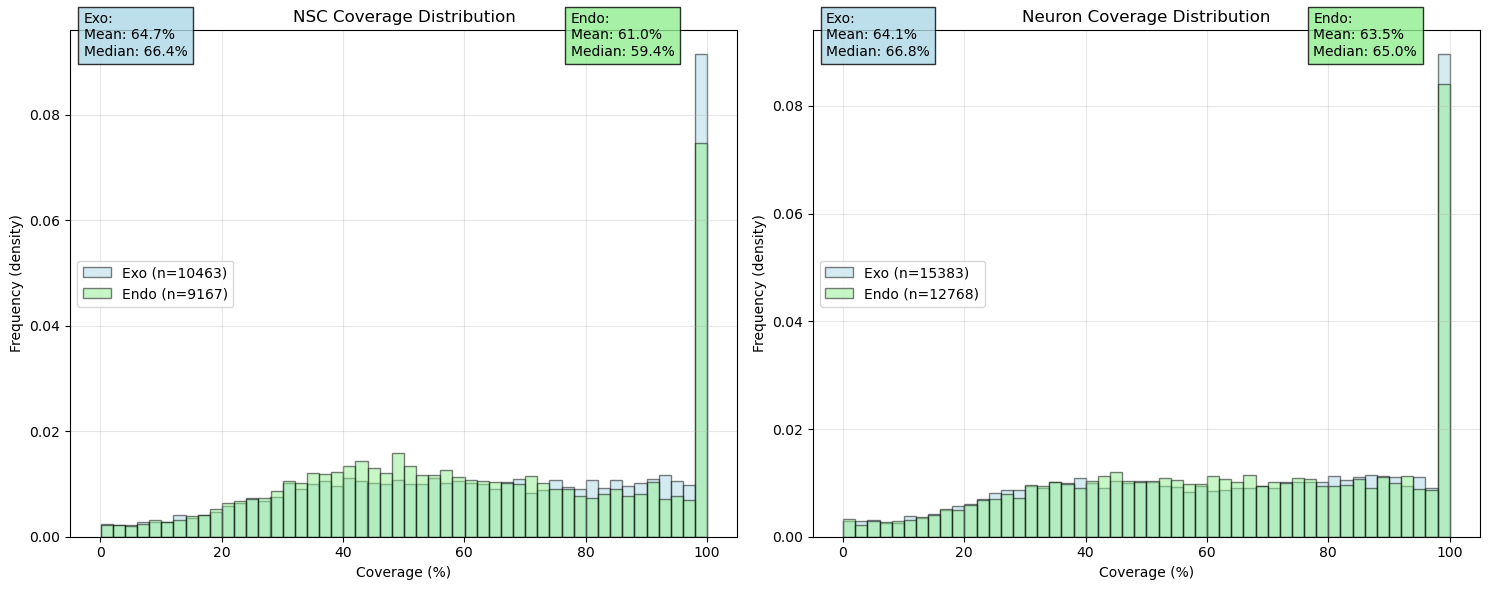

In [27]:
plot_coverage_distributions()